In [1]:
import numpy as np
import torch
import random
import copy
import matplotlib.pyplot as plt

In [2]:
from load_data import *

In [4]:
X_tr, X_te, y_tr, y_te, xs_tr, xs_te = load_german_data(svm=True,random_state=42,intercept=True)

In [5]:
def poison_Z(xs,pos_rt = 0.1, rs = 3):
    n_pos = int(len(xs)*pos_rt)
    random.seed(rs)
    r_idxs = list(range(len(xs)))
    random.shuffle(r_idxs)
    xsp = copy.deepcopy(xs)
    xsp[r_idxs[:n_pos]] = 1-xs_tr[r_idxs[:n_pos]]
    return xsp

In [6]:
from fairLR_train import *

In [7]:
xs_tep =  poison_Z(xs_te,pos_rt = 0.1, rs = 3)

In [8]:
train_flr(data = 'german',save_dir = '../results', filename = 'german_FLR_model')

load data: german
train FLR model
None
save model
saved in  ../results/german_FLR_model.sm
save testdata
saved in  ../results/german_testset.te
saved in  ../results/german_testX.te


In [9]:
from fairLR_test import *
from save_utils import load_flr, load_nparray,save_prediction

In [10]:
from fair_eval import calculate_prule_clf, calculate_odds_clf, calculate_parity_reg, calculate_group_loss,l2_loss, calculate_overall_accuracy,bce_loss

In [12]:
coef = load_flr( '../results/german_FLR_model.sm')
pred = predict_FairLR(X_te,coef)

In [15]:
def test_FLR(X_te, y_te,xs_te,load_path = '../results/german_FLR_model.sm'):
    coef = load_flr(load_path)
    pred = predict_FairLR(X_te,coef)
    calculate_overall_accuracy(pred,y_te)
    calculate_prule_clf(pred,y_te,xs_te)
    calculate_odds_clf(pred,y_te,xs_te)

300
poisoned ratio:  0.0


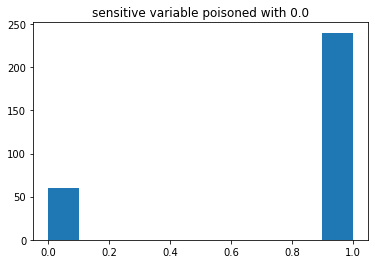

Overall accuracy: 0.78
disparate impact:  93.0
disparate misclassification rate:  57.50000000000001
disparate false positive rate: 63.468013468013474
disparate false negative rate: 60.207612456747405
equalized opportunity for -1 : 63.468013468013474
equalized opportunity for 1 : 95.86925287356321
poisoned ratio:  0.1


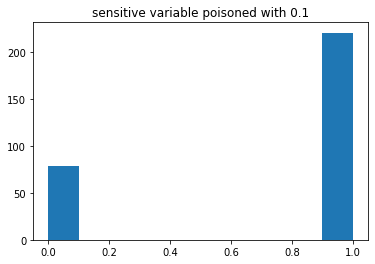

Overall accuracy: 0.78
disparate impact:  97.5117540687161
disparate misclassification rate:  58.62443438914027
disparate false positive rate: 75.50847457627118
disparate false negative rate: 79.50617283950618
equalized opportunity for -1 : 75.50847457627118
equalized opportunity for 1 : 97.56169212690952
poisoned ratio:  0.2


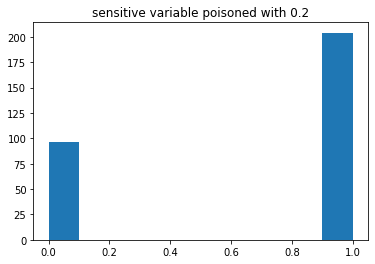

Overall accuracy: 0.78
disparate impact:  98.99068322981367
disparate misclassification rate:  67.97385620915031
disparate false positive rate: 79.59183673469387
disparate false negative rate: 87.83783783783784
equalized opportunity for -1 : 79.59183673469387
equalized opportunity for 1 : 98.66666666666667
poisoned ratio:  0.3


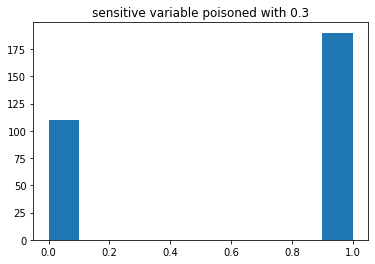

Overall accuracy: 0.78
disparate impact:  99.15305505142166
disparate misclassification rate:  73.86569872958259
disparate false positive rate: 80.26755852842811
disparate false negative rate: 90.98901098901099
equalized opportunity for -1 : 80.26755852842811
equalized opportunity for 1 : 99.0715579710145


In [16]:
print(len(xs_te))
for rt in [0.0,0.1,0.2,0.3]:
    print("="*20)
    print("poisoned ratio: ", rt)
    print("="*20)
    xs_tep =  poison_Z(xs_te,pos_rt =rt, rs = 3)
    plt.figure()
    plt.title('sensitive variable poisoned with '+str(rt))
    plt.hist(xs_tep.flatten())
    plt.show()

    test_FLR(X_te,y_te,xs_tep,load_path = '../results/german_FLR_model.sm')

# LR training and test

In [17]:
from sklearn import linear_model as lm

In [18]:
clf = lm.LogisticRegression()
clf.fit(X_tr,y_tr)

LogisticRegression()

In [19]:
def test_LR(clf,X_te, y_te,xs_te):
    pred = clf.predict(X_te)
    calculate_overall_accuracy(pred,y_te)
    calculate_prule_clf(pred,y_te,xs_te)
    calculate_odds_clf(pred,y_te,xs_te)

300
poisoned ratio:  0.0


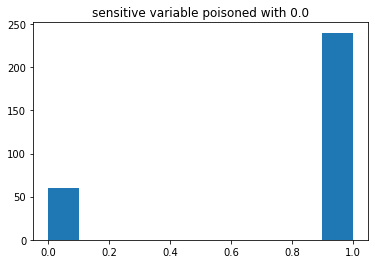

Overall accuracy: 0.7933333333333333
disparate impact:  100.0
disparate misclassification rate:  61.11111111111111
disparate false positive rate: 70.90909090909092
disparate false negative rate: 90.3114186851211
equalized opportunity for -1 : 70.90909090909092
equalized opportunity for 1 : 98.9618094178717
poisoned ratio:  0.1


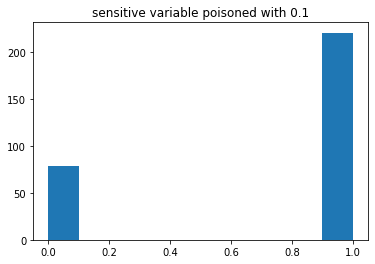

Overall accuracy: 0.7933333333333333
disparate impact:  92.17092266042292
disparate misclassification rate:  60.61381074168798
disparate false positive rate: 82.25324027916251
disparate false negative rate: 66.2551440329218
equalized opportunity for -1 : 82.25324027916251
equalized opportunity for 1 : 95.18213866039953
poisoned ratio:  0.2


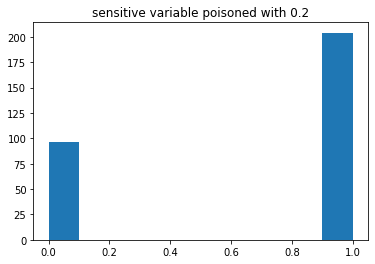

Overall accuracy: 0.7933333333333333
disparate impact:  96.83544303797468
disparate misclassification rate:  65.15837104072399
disparate false positive rate: 77.81954887218045
disparate false negative rate: 75.2895752895753
equalized opportunity for -1 : 77.81954887218045
equalized opportunity for 1 : 96.8395061728395
poisoned ratio:  0.3


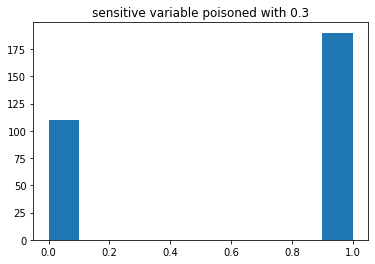

Overall accuracy: 0.7933333333333333
disparate impact:  99.37733499377336
disparate misclassification rate:  70.30075187969925
disparate false positive rate: 76.92307692307692
disparate false negative rate: 94.20289855072464
equalized opportunity for -1 : 76.92307692307692
equalized opportunity for 1 : 99.36


In [20]:
print(len(xs_te))
for rt in [0.0,0.1,0.2,0.3]:
    print("="*20)
    print("poisoned ratio: ", rt)
    print("="*20)
    xs_tep =  poison_Z(xs_te,pos_rt =rt, rs = 3)
    plt.figure()
    plt.title('sensitive variable poisoned with '+str(rt))
    plt.hist(xs_tep.flatten())
    plt.show()

    test_LR(clf,X_te,y_te,xs_tep)

In [4]:
bank = pd.read_csv('../data/bank-full.csv')

In [5]:
print(bank)

       age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pd